In [ ]:
!pip install EoN
import EoN
import numpy as np
import matplotlib.pyplot as plt`

TASK-1


In [ ]:
import pandas as pd
df=pd.read_csv("Resoltn1.csv",header='infer')

In [ ]:
df.head()

,Source,Target,Type,Id,Label,Weight
0,0,1,Directed,0,NaN,1
1,0,379,Directed,1,NaN,1
2,0,41,Directed,2,NaN,1
3,0,810,Directed,3,NaN,1
4,0,852,Directed,4,NaN,1


**TASK 2**

a) Choose **two different centrality measures** (you have to justify your choosing;
refer to the lecture slides and bibliography, and chapter 7 in [6] for a good
review on centrality measures). For each one, run 10 times the **SI model
starting with only the most central node being infected**. Then, run 10 times
the **same model but now with the least central node initially infected**. You can
use an arbitrary value of the transmission rate as long as you keep the value
consistent throughout the whole analysis.


In [ ]:
import networkx as nx
Data = open('Edges.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=int)

In [ ]:
eigen_centrality = nx.eigenvector_centrality(G)

In [ ]:
print(max(eigen_centrality, key = eigen_centrality.get), min(eigen_centrality, key = eigen_centrality.get))

59 858


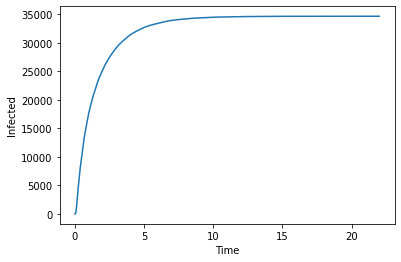

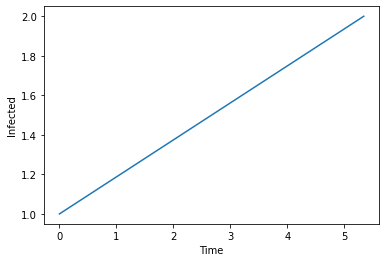

In [ ]:
# Running the SI model with the most central node being infected
t, S, I, R = EoN.fast_SIR(G, tau = 0.5, gamma = 0, initial_infecteds = 59)
plt.plot(t, I)
plt.xlabel("Time")
plt.ylabel("Infected")
plt.show()

# Running the SI model with the least central node being infected
t, S, I, R = EoN.fast_SIR(G, tau = 0.5, gamma = 0, initial_infecteds = 858)
plt.plot(t, I)
plt.xlabel("Time")
plt.ylabel("Infected")
plt.show()

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
print(max(betweenness_centrality, key = betweenness_centrality.get), min(betweenness_centrality, key = betweenness_centrality.get))

b) From the above simulations, create a plot of **Ti vs Di**, where each data point corresponds to a specific node, and where Ti is the **time steps it took for node i to get infected, and Di is the distance from node i to the initially infected node**. 

In [ ]:
# single_source_shortest_path_length-Compute the shortest path lengths from source to all reachable nodes
distance = dict(nx.single_source_shortest_path_length(G,858))
sim = EoN.fast_SIR(G, tau=0.5, gamma=0, initial_infecteds=858, return_full_data=True) #min eigen vector

sim = EoN.fast_SIR(G, tau=0.5, gamma=0, initial_infecteds=1333, return_full_data=True)# min betweenenes
distance = dict(nx.single_source_shortest_path_length(G,1333))

reachable_points = list(distance.keys())

2.89778441705012


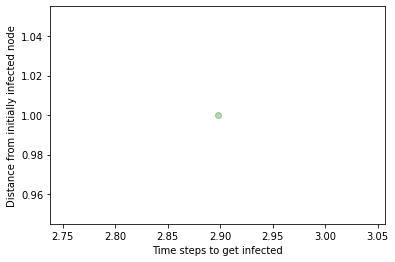

In [ ]:
time = []
distances = []

for i in reachable_points:
    if i == 59 or i ==3498 or i==858 or i==1333 : 
        continue
    #printing the time step when the node i got infected 
    print(sim.node_history(i)[0][1])   
    time.append(sim.node_history(i)[0][1])
    distances.append(distance[i])

#plotting the scatter plot between time and distances of node i to the initally infected node
plt.scatter(time, distances, color='g', alpha=0.3, label='Simulation')
plt.xlabel('Time steps to get infected')
plt.ylabel('Distance from initially infected node')
plt.show()

**TASK 3**

Run a SI model where the first infected node is a randomly chosen node from
the community. Plot Nc vs t, where Nc is the number of nodes infected for
community c (with c=1,..,5). 

In [ ]:
# # Get the five largest communities using the Louvain algorithm
from networkx.algorithms import community 
partition = community.louvain_communities(G,weight=None,resolution=1)

In [ ]:
largest_communities=sorted(partition,key=len,reverse=True)[:5]

In [ ]:
for i in range(5):
  print(len(largest_communities[i]))

5897
5585
4088
1883
1737


Community 0 size:5724, clustering:0.18859527203765844, average centrality:0.0008478422606783845
16532


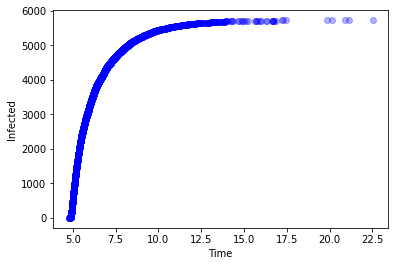

Community 1 size:4933, clustering:0.20514405521908805, average centrality:0.0014523898422147323
12188


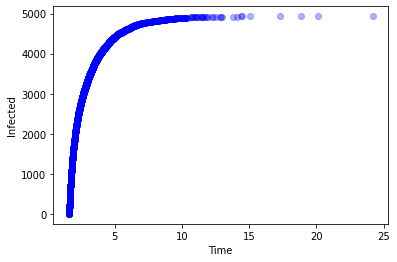

Community 2 size:4545, clustering:0.17609602334103175, average centrality:0.0012406258231455823
15771


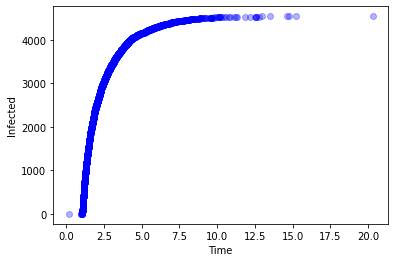

Community 3 size:2302, clustering:0.13857516360562416, average centrality:0.0014219632532374137
22047


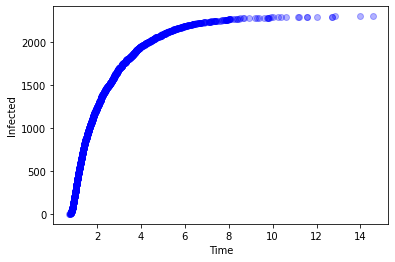

Community 4 size:1629, clustering:0.12996213550637759, average centrality:0.0018778195573776071
13507


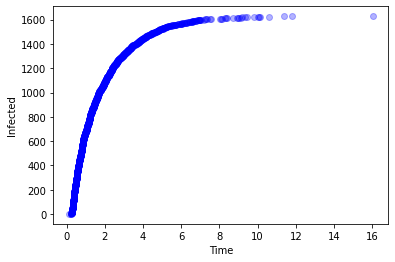

In [ ]:
for c, community in enumerate(largest_communities):
  subgraph = G.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)

  #plotting the time vs number of nodes infected in each community
  plt.scatter(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

**Task 3b**:-**Create a random graph (Hint: you can use erdos_renyi_graph() or
gnm_random_graph() from the Python NetworkX library) with the same
number of edges and nodes than the original network. Run the same
simulations than in (a). Compare the plots obtained in (a) and (b), and
discuss the differences.**

In [ ]:
num_nodes = len(G.nodes())
num_edges = len(G.edges())

In [ ]:
G_random = nx.gnm_random_graph(num_nodes, num_edges)

In [ ]:
G_random

In [ ]:
from networkx.algorithms import community 

In [ ]:
partition = community.louvain_communities(G_random,weight=None,resolution=1)

In [ ]:
largest_communities_3b=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:5249, clustering:0.0004652435686918446, average centrality:0.0006662128442583835
13346


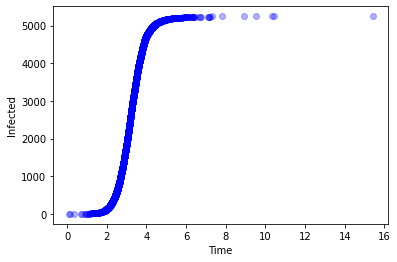

Community 1 size:1915, clustering:0.0021235857267188863, average centrality:0.0014105218931004184
29651


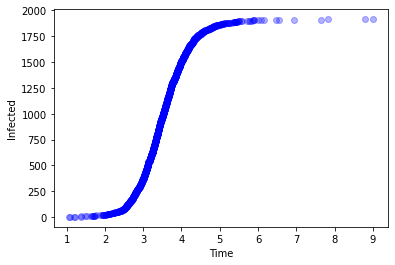

Community 2 size:1707, clustering:0.00019527436047646945, average centrality:0.0015370129615932336
13064


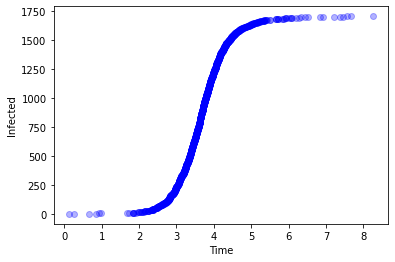

Community 3 size:1683, clustering:0.0, average centrality:0.001566338350279041
31025


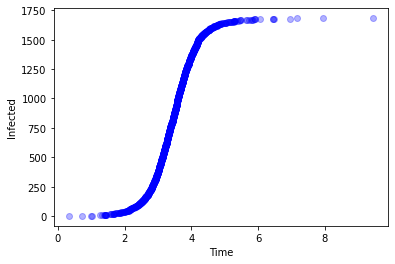

Community 4 size:1663, clustering:0.0011224694327520545, average centrality:0.0015745832166506478
13926


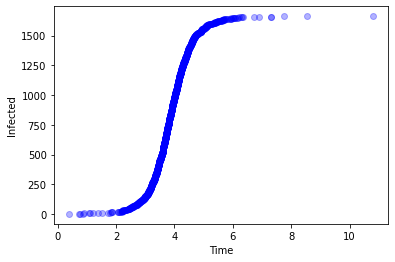

In [ ]:
for c, community in enumerate(largest_communities_3b):
  subgraph = G_random.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_random, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
#         print(p)
#         print(sim.node_history(p))
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.scatter(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

**TASK 4**

a)) Randomly remove 5% of the network’s nodes. Then, run a SI model where
the first infected node is a randomly chosen node from the largest
community. Plot Nc vs t, where Nc is the number of nodes infected for
community c (with c = 1, … ,5). Then repeat the process for 10%, 15%, 20%
and 25%. How is the evolution changing depending on the percentage of
removed nodes?

Randomly removing 5% of the network’s nodes

In [ ]:
G_mod_5 = G.copy() 

In [ ]:
len(G.nodes())

35776

In [ ]:
import random

# Define the fraction of nodes to remove
frac_nodes_to_remove = 0.05

# Get a list of all nodes in the network
all_nodes = list(G_mod_5.nodes())

# Randomly select a fraction of nodes to remove
nodes_to_remove = random.sample(all_nodes, int(frac_nodes_to_remove * len(all_nodes)))

# Remove the selected nodes from the network
G_mod_5.remove_nodes_from(nodes_to_remove)


In [ ]:
len(G_mod_5.nodes())

33988

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_mod_5,weight=None,resolution=1)

In [ ]:
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:5820, clustering:0.18870890558471773, average centrality:0.0013700822462733907
28632


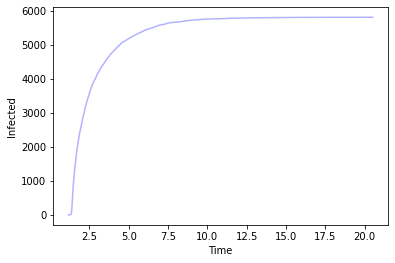

Community 1 size:5047, clustering:0.18580510254286198, average centrality:0.0009266835464429964
2037


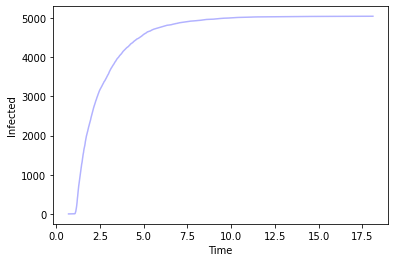

Community 2 size:3537, clustering:0.1659328259816746, average centrality:0.0013210379734853426
17520


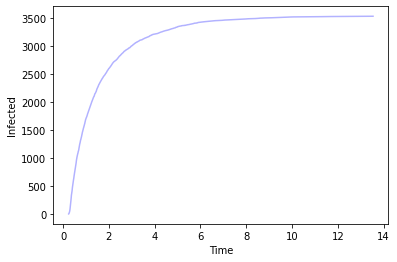

Community 3 size:2106, clustering:0.14741067927856477, average centrality:0.001531198047429201
18334


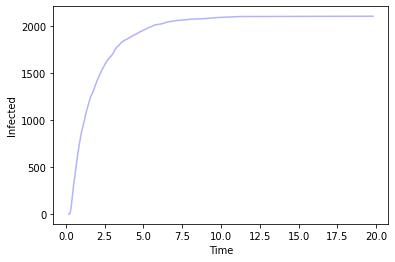

Community 4 size:1806, clustering:0.1554211955747293, average centrality:0.0020228048701925873
16675


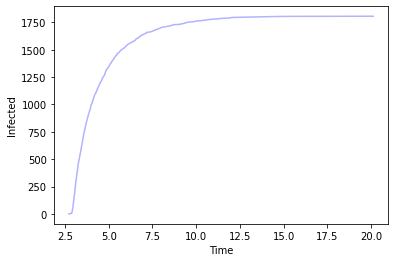

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_mod_5.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_mod_5, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Randomly removing 10% of the network’s nodes

In [ ]:
G_mod_10 = G.copy() 
# Define the fraction of nodes to remove
frac_nodes_to_remove = 0.1

# Get a list of all nodes in the network
all_nodes = list(G_mod_10.nodes())

# Randomly select a fraction of nodes to remove
nodes_to_remove = random.sample(all_nodes, int(frac_nodes_to_remove * len(all_nodes)))

# Remove the selected nodes from the network
G_mod_10.remove_nodes_from(nodes_to_remove)

In [ ]:
len(G.nodes())

35776

In [ ]:
len(G_mod_10.nodes())

32199

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_mod_10,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:5096, clustering:0.19359818155816383, average centrality:0.0015110852977109467
7021


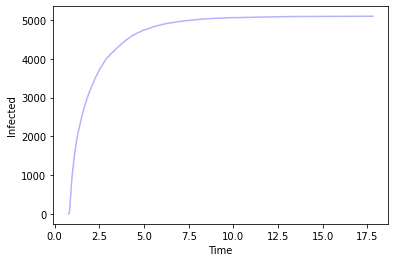

Community 1 size:4466, clustering:0.17683893375981236, average centrality:0.0009975582590171083
8914


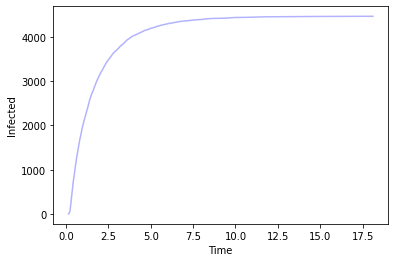

Community 2 size:3280, clustering:0.17156780716444997, average centrality:0.0015484717976181899
29562


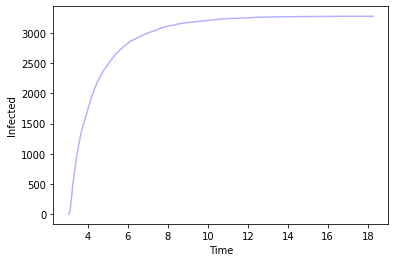

Community 3 size:2023, clustering:0.13752584133081763, average centrality:0.001613492316109553
2177


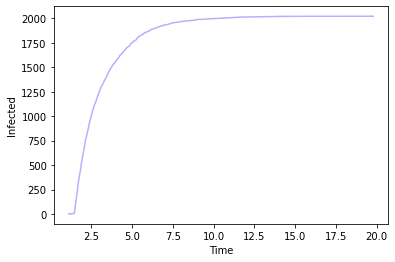

Community 4 size:1823, clustering:0.19675647598959956, average centrality:0.0026939587042744536
11900


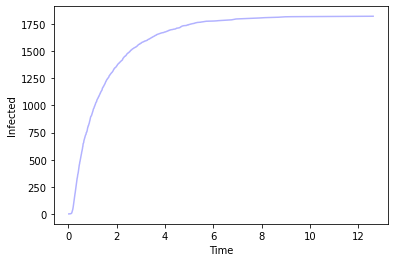

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_mod_10.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_mod_10, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Randomly removing 15% of the network’s nodes

In [ ]:
G_mod_15 = G.copy() 
# Define the fraction of nodes to remove
frac_nodes_to_remove = 0.15

# Get a list of all nodes in the network
all_nodes = list(G_mod_15.nodes())

# Randomly select a fraction of nodes to remove
nodes_to_remove = random.sample(all_nodes, int(frac_nodes_to_remove * len(all_nodes)))

# Remove the selected nodes from the network
G_mod_15.remove_nodes_from(nodes_to_remove)

In [ ]:
len(G_mod_15.nodes())

30410

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_mod_15,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:5273, clustering:0.19344728341844022, average centrality:0.0015193212365109132
14638


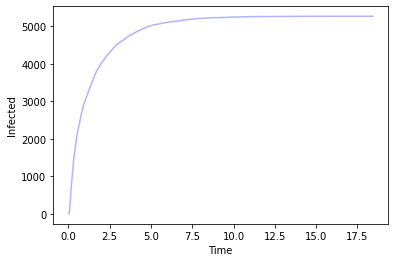

Community 1 size:4102, clustering:0.18348035813056182, average centrality:0.0010846315801487623
23292


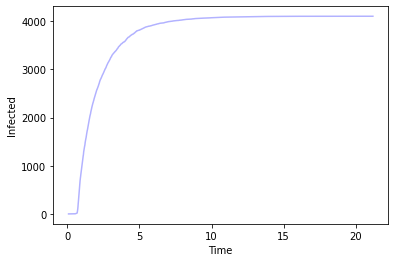

Community 2 size:2026, clustering:0.137893337148407, average centrality:0.0016023789501907423
14048


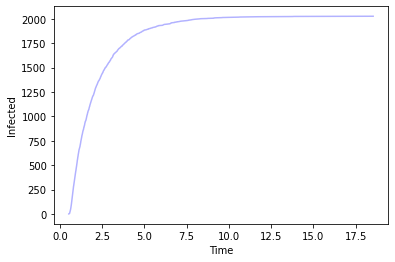

Community 3 size:1418, clustering:0.20881967731758666, average centrality:0.0025023565350423987
1467


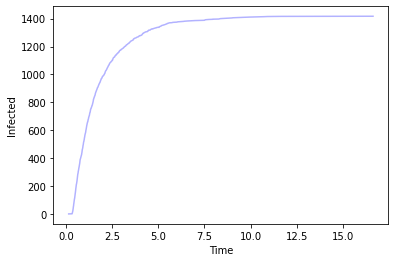

Community 4 size:1334, clustering:0.21616935746597607, average centrality:0.003869033225322849
15312


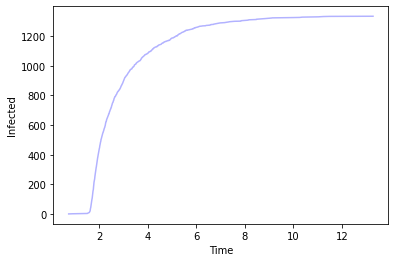

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_mod_15.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_mod_15, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Randomly removing 20% of the network’s nodes

In [ ]:
G_mod_20 = G.copy() 
# Define the fraction of nodes to remove
frac_nodes_to_remove = 0.2

# Get a list of all nodes in the network
all_nodes = list(G_mod_20.nodes())

# Randomly select a fraction of nodes to remove
nodes_to_remove = random.sample(all_nodes, int(frac_nodes_to_remove * len(all_nodes)))

# Remove the selected nodes from the network
G_mod_20.remove_nodes_from(nodes_to_remove)

In [ ]:
len(G_mod_20.nodes())

28621

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_mod_20,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:4232, clustering:0.19764740943163583, average centrality:0.0017186809573231858
31033


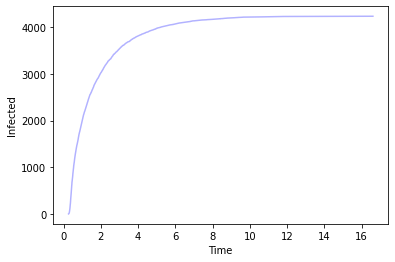

Community 1 size:3447, clustering:0.16641294230906545, average centrality:0.0012547184536049684
25753


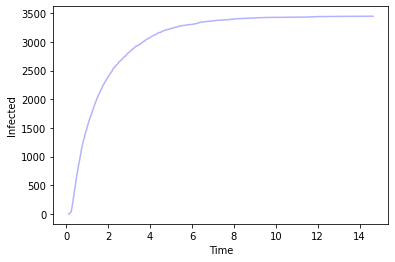

Community 2 size:2057, clustering:0.1425327840987755, average centrality:0.001937958834689931
18033


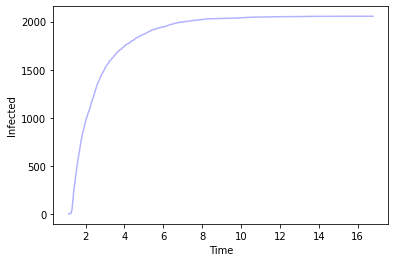

Community 3 size:1306, clustering:0.13043349850853336, average centrality:0.0024220661491612303
20182


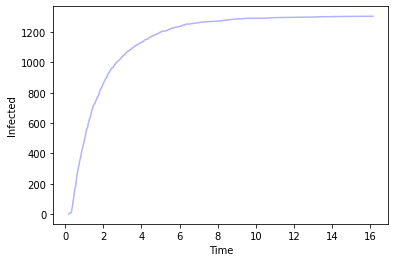

Community 4 size:1127, clustering:0.14646785176362437, average centrality:0.002953502043338036
31719


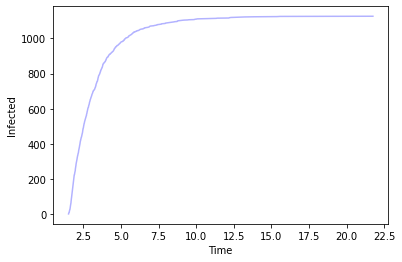

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_mod_20.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_mod_20, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Randomly removing 25% of the network’s nodes



In [ ]:
G_mod_25 = G.copy() 
# Define the fraction of nodes to remove
frac_nodes_to_remove = 0.25

# Get a list of all nodes in the network
all_nodes = list(G_mod_25.nodes())

# Randomly select a fraction of nodes to remove
nodes_to_remove = random.sample(all_nodes, int(frac_nodes_to_remove * len(all_nodes)))

# Remove the selected nodes from the network
G_mod_25.remove_nodes_from(nodes_to_remove)

In [ ]:
len(G_mod_25.nodes())

26832

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_mod_25,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:4315, clustering:0.17880637393889615, average centrality:0.0017318375431309208
10306


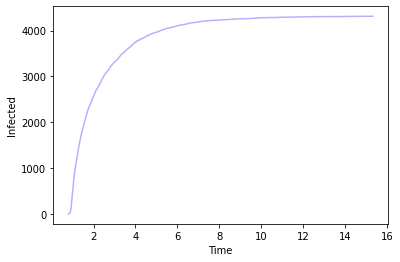

Community 1 size:3011, clustering:0.1733821751929771, average centrality:0.0012823412713738038
1769


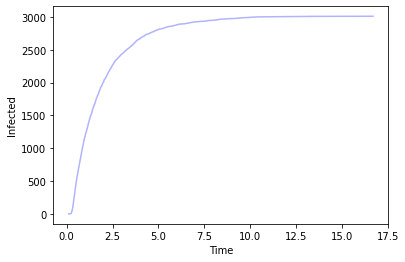

Community 2 size:1685, clustering:0.15984903934683256, average centrality:0.002508510893238445
26735


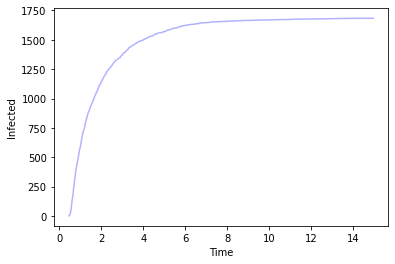

Community 3 size:1407, clustering:0.13374531363240974, average centrality:0.002247450008644021
22529


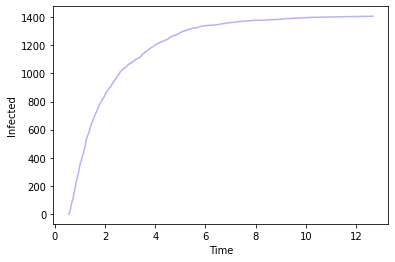

Community 4 size:945, clustering:0.11847099563538126, average centrality:0.0029795534032822663
12035


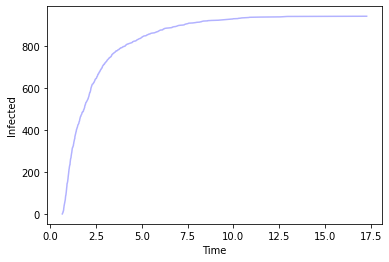

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_mod_25.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_mod_25, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

**Task-4b)** Repeat what you have done in (a) but now, instead of removing X% of
random nodes, remove the X% of the nodes with the highest eigenvector
centrality.

In [ ]:
sorted_values=dict(sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True))

In [ ]:
fraction_nodes=int(len(eigen_centrality)*0.05)
removing_nodes=list(sorted_values.keys())[:fraction_nodes]
print(len(removing_nodes))

1788


In [ ]:
G_eigen = G.copy() 

# Remove the selected nodes from the network
G_eigen.remove_nodes_from(removing_nodes)

In [ ]:
from networkx.algorithms import community 
partition = community.louvain_communities(G_eigen,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:883, clustering:0.1145987438158664, average centrality:0.003382100291985448
9389


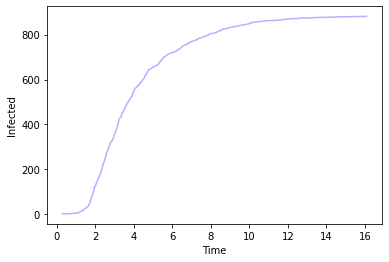

Community 1 size:679, clustering:0.08421324735403567, average centrality:0.004140220087670148
10582


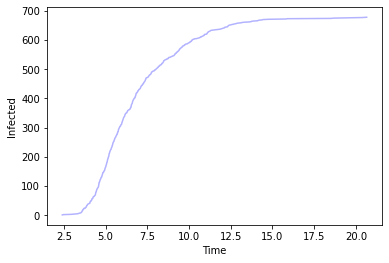

Community 2 size:648, clustering:0.07492702915775337, average centrality:0.0043314824355525266
34728


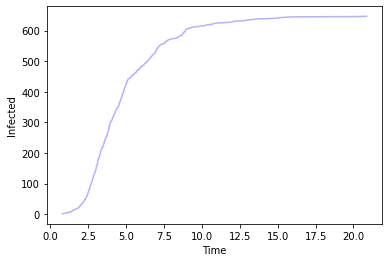

Community 3 size:627, clustering:0.07589621097354292, average centrality:0.003882782762890373
33130


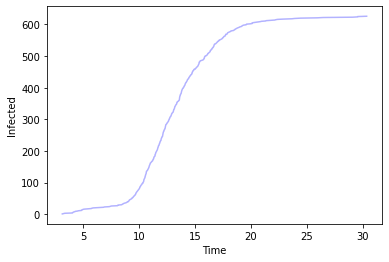

Community 4 size:566, clustering:0.14706497680084657, average centrality:0.005866349792051
2975


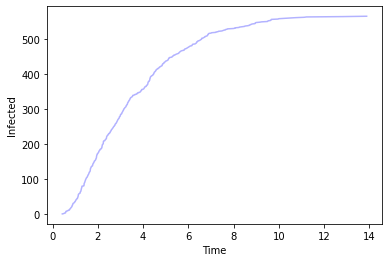

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_eigen.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_eigen, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Randomly removing 10% of the network’s nodes
 

In [ ]:
fraction_nodes=int(len(eigen_centrality)*0.1)
removing_nodes=list(sorted_values.keys())[:fraction_nodes]
print(len(removing_nodes))

3577


In [ ]:
G_eigen = G.copy() 

# Remove the selected nodes from the network
G_eigen.remove_nodes_from(removing_nodes)
from networkx.algorithms import community 
partition = community.louvain_communities(G_eigen,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:457, clustering:0.1389285593228728, average centrality:0.006545356827517393
30593


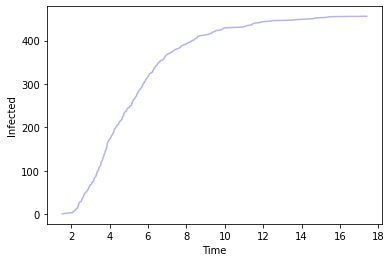

Community 1 size:402, clustering:0.06510422108222581, average centrality:0.006141363010384461
31298


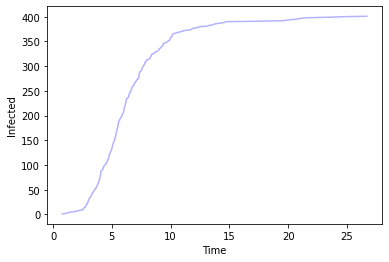

Community 2 size:369, clustering:0.14172151535568667, average centrality:0.008675032402497907
24532


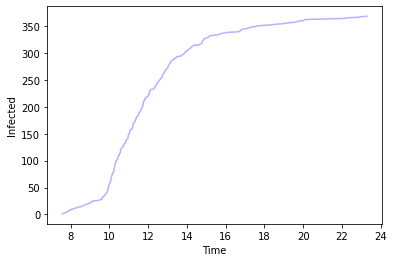

Community 3 size:346, clustering:0.06780311852566187, average centrality:0.006919661556504965
9924


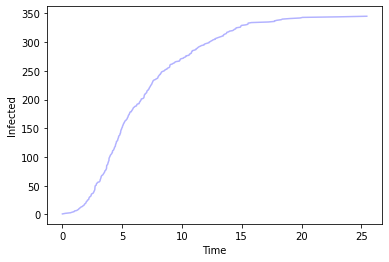

Community 4 size:318, clustering:0.06998291214503533, average centrality:0.008094756264508042
13592


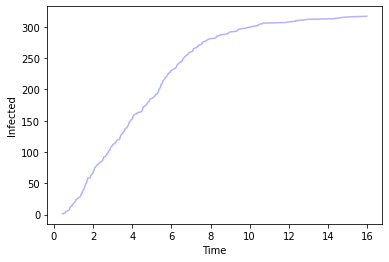

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_eigen.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_eigen, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Removing 15% of networking nodes

In [ ]:
fraction_nodes=int(len(eigen_centrality)*0.15)
removing_nodes=list(sorted_values.keys())[:fraction_nodes]
print(len(removing_nodes))

5366


In [ ]:
G_eigen = G.copy() 

# Remove the selected nodes from the network
G_eigen.remove_nodes_from(removing_nodes)
from networkx.algorithms import community 
partition = community.louvain_communities(G_eigen,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:359, clustering:0.0631213379286523, average centrality:0.00664477676973594
17917


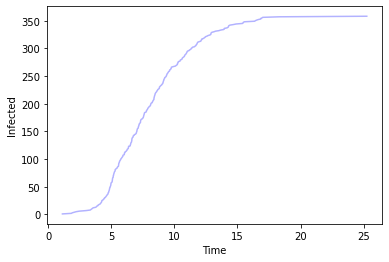

Community 1 size:307, clustering:0.12489446311921878, average centrality:0.009197164207702606
22251


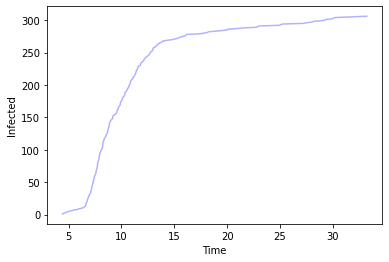

Community 2 size:280, clustering:0.05401632653061224, average centrality:0.007706093189964131
7805


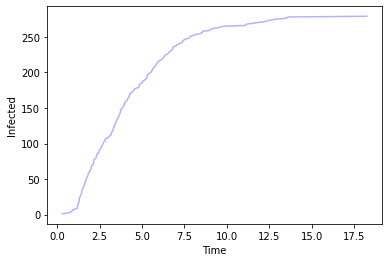

Community 3 size:265, clustering:0.1602875040226634, average centrality:0.012750142938822252
18508


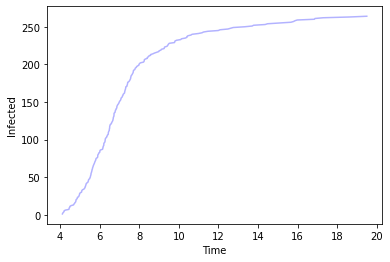

Community 4 size:233, clustering:0.06401091681423601, average centrality:0.009730649696610952
18107


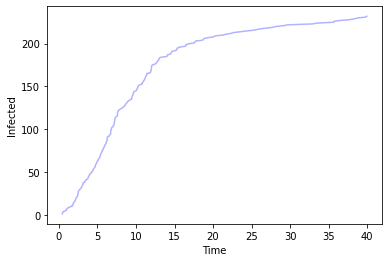

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_eigen.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_eigen, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Removing 20% of networking nodes

In [ ]:
fraction_nodes=int(len(eigen_centrality)*0.2)
removing_nodes=list(sorted_values.keys())[:fraction_nodes]
print(len(removing_nodes))

7155


In [ ]:
G_eigen = G.copy() 

# Remove the selected nodes from the network
G_eigen.remove_nodes_from(removing_nodes)
from networkx.algorithms import community 
partition = community.louvain_communities(G_eigen,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:197, clustering:0.19844749627736866, average centrality:0.018439863254946662
31212


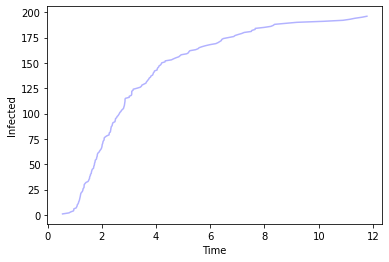

Community 1 size:169, clustering:0.13262852368042377, average centrality:0.01958298112144263
7057


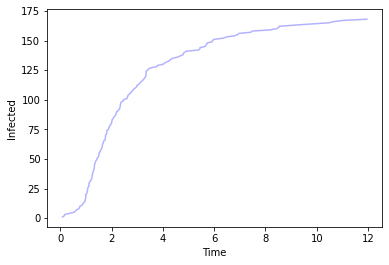

Community 2 size:157, clustering:0.12871189909406472, average centrality:0.017393434590886794
15616


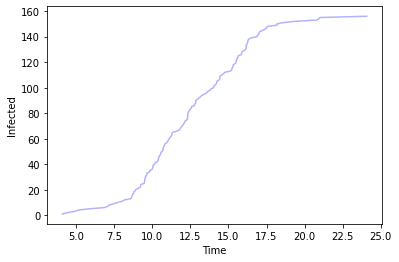

Community 3 size:149, clustering:0.16169830393550963, average centrality:0.018501723199709774
11788


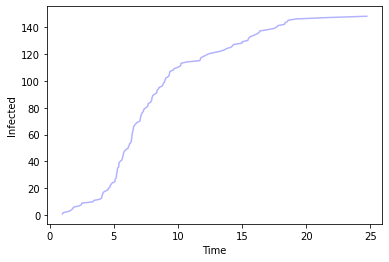

Community 4 size:134, clustering:0.14437714027266269, average centrality:0.018628661205251938
4172


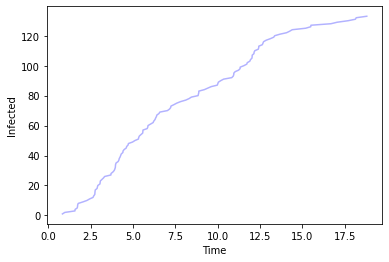

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_eigen.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_eigen, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()

Removing 25% of networking nodes

In [ ]:
fraction_nodes=int(len(eigen_centrality)*0.25)
removing_nodes=list(sorted_values.keys())[:fraction_nodes]
print(len(removing_nodes))

8944


In [ ]:
G_eigen = G.copy() 

# Remove the selected nodes from the network
G_eigen.remove_nodes_from(removing_nodes)
from networkx.algorithms import community 
partition = community.louvain_communities(G_eigen,weight=None,resolution=1)
largest_communities_4a=sorted(partition,key=len,reverse=True)[:5]

Community 0 size:169, clustering:0.13262852368042374, average centrality:0.01958298112144263
21720


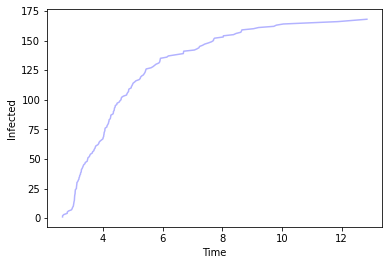

Community 1 size:156, clustering:0.22749204839410067, average centrality:0.025558312655086804
24569


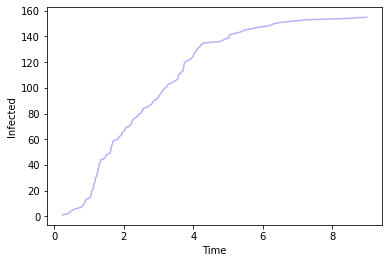

Community 2 size:142, clustering:0.14993023408516368, average centrality:0.017181100789131924
23390


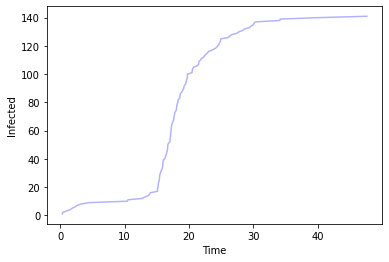

Community 3 size:107, clustering:0.11572197273131853, average centrality:0.022570975136660246
8930


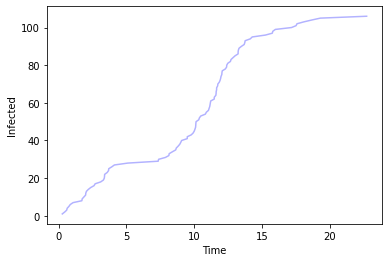

Community 4 size:103, clustering:0.07484226700388893, average centrality:0.020559680182752692
30224


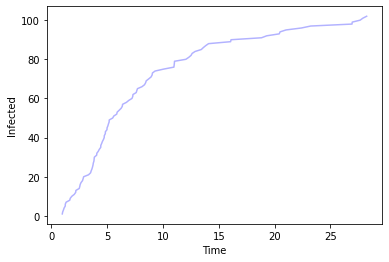

In [ ]:
for c, community in enumerate(largest_communities_4a):
  subgraph = G_eigen.subgraph((community))
  size = len(subgraph.nodes)
  clustering = nx.average_clustering(subgraph)
  centrality = nx.degree_centrality(subgraph)
  avg_centrality = sum(centrality.values()) / len(centrality)
  print("Community", c, "size:{0},".format(size), "clustering:{0},".format(clustering),"average centrality:{0}".format(avg_centrality))
  
  first_infected_node = np.random.choice(list(community))
  print(first_infected_node)
  sim = EoN.fast_SIR(G_eigen, tau=0.5, gamma=0, initial_infecteds=first_infected_node, return_full_data=True)
  time = []
  infected_in_community = []
  num = 1
  for p in community:
        if p == first_infected_node:
            continue
        time.append(sim.node_history(p)[0][1])
        infected_in_community.append(num)
        num += 1
  time = sorted(time)
  plt.plot(time, infected_in_community, color='b', alpha=0.3, label="Community "+str(c))
  plt.xlabel("Time")
  plt.ylabel("Infected")
  plt.show()